# CS-20115 Syed Sheroz

# Importing Libraries

In [1]:
# EDA packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import pickle
from scipy import stats
import matplotlib.pyplot as plt

# Reading Csv File

In [2]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Feature Engineering

In [3]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df['day']=pd.to_datetime(df['Formatted Date']).dt.strftime('%d')
df['month']=pd.to_datetime(df['Formatted Date']).dt.strftime('%m')
df['hour']=pd.to_datetime(df['Formatted Date']).dt.hour
df['Precipitation'] = (df['Temperature (C)'] * df['Humidity'] * df['Pressure (millibars)']) / 10000

# df['minute']=pd.to_datetime(df['Formatted Date']).dt.minute
# df['seconds']=pd.to_datetime(df['Formatted Date']).dt.second

# df['Temp_Feel'] = df['Temperature (C)'] - df['Apparent Temperature (C)']# Positive values indicate that it feels hotter than it actually is, while negative values indicate that it feels colder than it actually is.

# bins = [-np.inf, 45, 90, 135, 180, 225, 270, 315, np.inf]
# labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
# df['Wind_Dir'] = pd.cut(df['Wind Bearing (degrees)'], bins=bins, labels=labels)

# binss = [-np.inf, 0.3, 0.7, np.inf]
# labelss = ['Low', 'Medium', 'High']
# df['Humidity_lvl'] = pd.cut(df['Humidity'], bins=binss, labels=labelss)
# df.head()

# binsss = [-np.inf, 5, 15, np.inf]
# labelsss = ['Low', 'Medium', 'High']
# df['Visibility lvl'] = pd.cut(df['Visibility (km)'], bins=binsss, labels=labelsss)


# binssss = [-np.inf, 1, 5, 10, 20, 30,np.inf]
# labelssss =  ['Calm', 'Light breeze', 'Moderate breeze', 'Fresh breeze', 'Strong breeze','High wind']
# df['Wind Speed lvl'] = pd.cut(df['Wind Speed (km/h)'], bins=binssss, labels=labelssss)

# bins = [-50, -20, 0, 10, 20, 30, np.inf]
# labels = ['Below freezing', 'Freezing', 'Cold', 'Cool', 'Warm', 'Hot']
# df['Temperature lvl'] = pd.cut(df['Temperature (C)'], bins=bins, labels=labels)

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,month,hour,Precipitation
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,31,03,22,0.855783
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,31,03,23,0.817153
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,01,04,0,0.847926
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,01,04,1,0.699267
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,01,04,2,0.738709


# Selecting 3 Class For Prediction As Per Cep Requirement

In [4]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [5]:
df1=df[df['Summary'].isin(['Partly Cloudy','Clear','Foggy'])]
df1['Summary'].value_counts()

Partly Cloudy    31733
Clear            10890
Foggy             7148
Name: Summary, dtype: int64

c:\Users\Danish kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Summary', ylabel='count'>

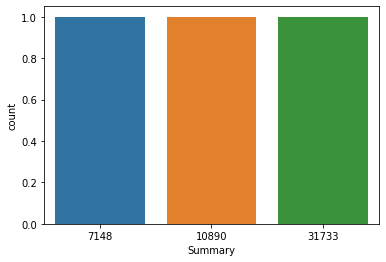

In [6]:
sns.countplot(df1['Summary'].value_counts())

# Change In Data Size

In [7]:
print(f'old data frame {df.shape}')
print(f'new data frame {df1.shape}')

old data frame (96453, 16)
new data frame (49771, 16)


In [8]:
df1.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
day                                      object
month                                    object
hour                                      int64
Precipitation                           float64
dtype: object

# Handling Null Values

In [9]:
df1.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 256
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
day                           0
month                         0
hour                          0
Precipitation                 0
dtype: int64

In [10]:
df1[df1.isnull().any(axis=1)].head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,month,hour,Precipitation
52681,2012-04-11 23:00:00+00:00,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150.0,16.1,0.0,1002.05,Light rain in the morning.,11,04,23,0.653069
52684,2012-04-12 02:00:00+00:00,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142.0,16.1,0.0,1001.11,Light rain in the morning.,12,04,2,0.712134


In [11]:
df1.fillna(df1['Precip Type'].mode()[0],inplace=True)

C:\Users\Danish kamal\AppData\Local\Temp\ipykernel_13532\1926116654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(df1['Precip Type'].mode()[0],inplace=True)


In [12]:
df1.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
day                         False
month                       False
hour                        False
Precipitation               False
dtype: bool

# Dropping Dublicates

In [13]:
print(df1.shape)
df1 = df1.drop_duplicates()
print(df1.shape)


(49771, 16)
(49747, 16)


# Dropping Unnecessary Columns

In [14]:
df1['Summary'].value_counts()

Partly Cloudy    31726
Clear            10873
Foggy             7148
Name: Summary, dtype: int64

In [15]:
df1['Loud Cover'].value_counts()

0.0    49747
Name: Loud Cover, dtype: int64

In [16]:
df1.drop(['Precip Type','Formatted Date','Loud Cover','Daily Summary'],axis=1,inplace=True)


df1.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,31,03,22,0.855783
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,31,03,23,0.817153
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,01,04,1,0.699267
5,Partly Cloudy,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,01,04,3,0.796948
6,Partly Cloudy,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,01,04,4,0.746950


In [17]:
df1.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,31,03,22,0.855783
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,31,03,23,0.817153
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,01,04,1,0.699267
5,Partly Cloudy,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,01,04,3,0.796948
6,Partly Cloudy,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,01,04,4,0.746950


# Encoding For Categorical Data

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()

# cols = ['Wind_Dir','Summary'] 
cols = ['Summary']  



for col in cols:
    df1[col] = le.fit_transform(df1[col].astype(str))
    

In [19]:
# from sklearn.preprocessing import OrdinalEncoder


# # cols_to_encode = ['Humidity_lvl','Visibility lvl','Wind Speed lvl','Temperature lvl']
# cols_to_encode = ['Humidity_lvl','Visibility lvl','Wind Speed lvl']


# encoder = OrdinalEncoder()

# df1[cols_to_encode] = encoder.fit_transform(df1[cols_to_encode].astype(str))


# Checking Colinearaity

C:\Users\Danish kamal\AppData\Local\Temp\ipykernel_13532\780162458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

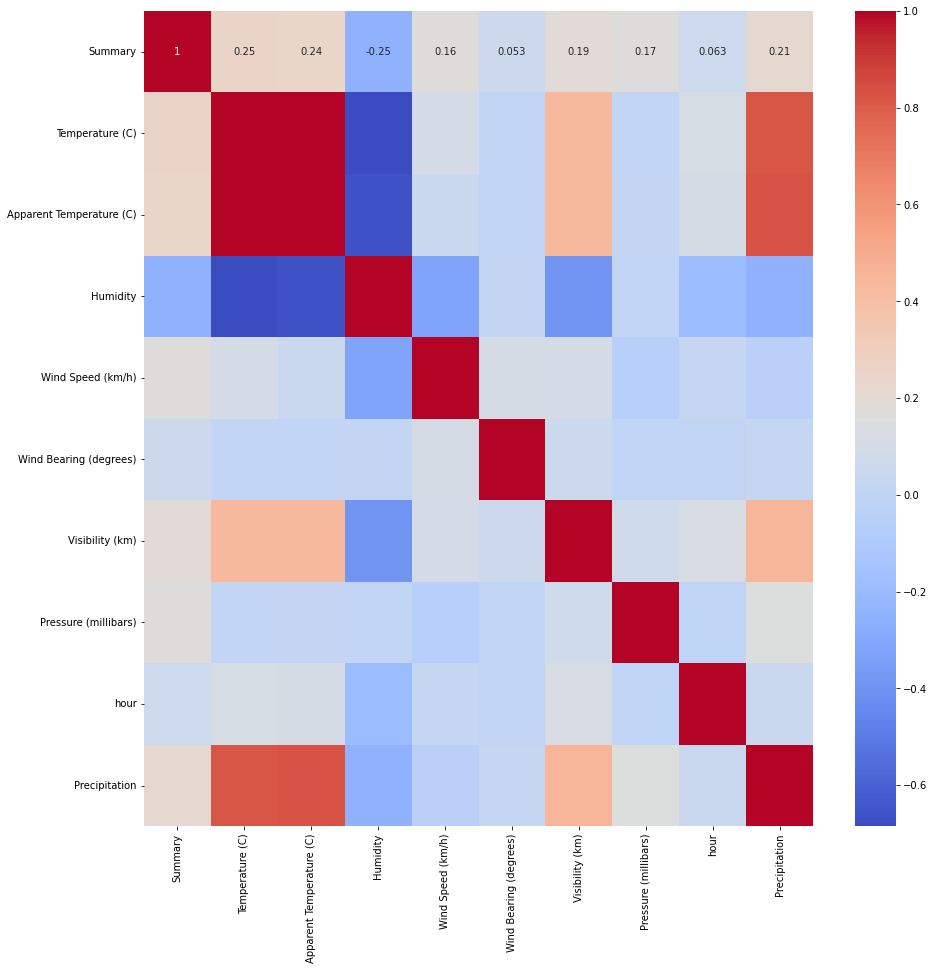

In [19]:
corr = df1.corr()

# red indicating high positive correlation, blue indicating high negative correlation, and white indicating no correlation.
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)


# Drooping Column Due To Multicolineraity

In [20]:
df1.columns.tolist()

['Summary',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)',
 'day',
 'month',
 'hour',
 'Precipitation']

In [21]:
col=df1.columns.tolist()
col.remove('Apparent Temperature (C)')
df1=df1[col]
df1.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
0,2,9.472222,0.89,14.1197,251.0,15.8263,1015.13,31,03,22,0.855783
1,2,9.355556,0.86,14.2646,259.0,15.8263,1015.63,31,03,23,0.817153
3,2,8.288889,0.83,14.1036,269.0,15.8263,1016.41,01,04,1,0.699267
5,2,9.222222,0.85,13.9587,258.0,14.9569,1016.66,01,04,3,0.796948
6,2,7.733333,0.95,12.3648,259.0,9.9820,1016.72,01,04,4,0.746950


c:\Users\Danish kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

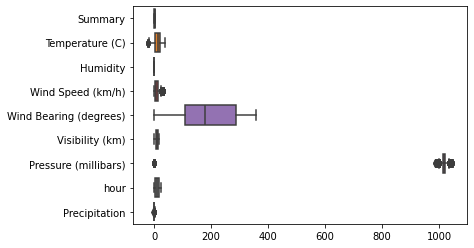

In [22]:
sns.boxplot(data=df1,orient='h')

# Removing Outliers

In [23]:
import pandas as pd
from sklearn.svm import OneClassSVM

# Load the dataset
dt=df1

# Fit the One-Class SVM model
clf = OneClassSVM(nu=0.05)
clf.fit(df1)

# Predict the anomalies
y_pred = clf.predict(df1)

# Remove the outliers
df1 = df1[y_pred == 1]

# Save the cleaned dataset
# df_clean.to_csv("one_class_svm_cleaned_data.csv", index=False)
print('Original: ',dt.shape)
print('Cleaned: ',df1.shape)

Original:  (49747, 11)
Cleaned:  (47260, 11)


c:\Users\Danish kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

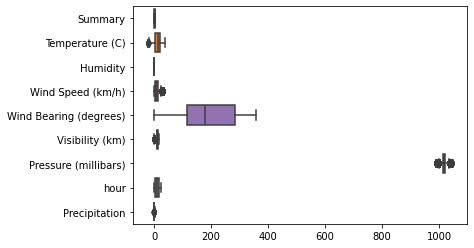

In [24]:
sns.boxplot(data=df1,orient='h')

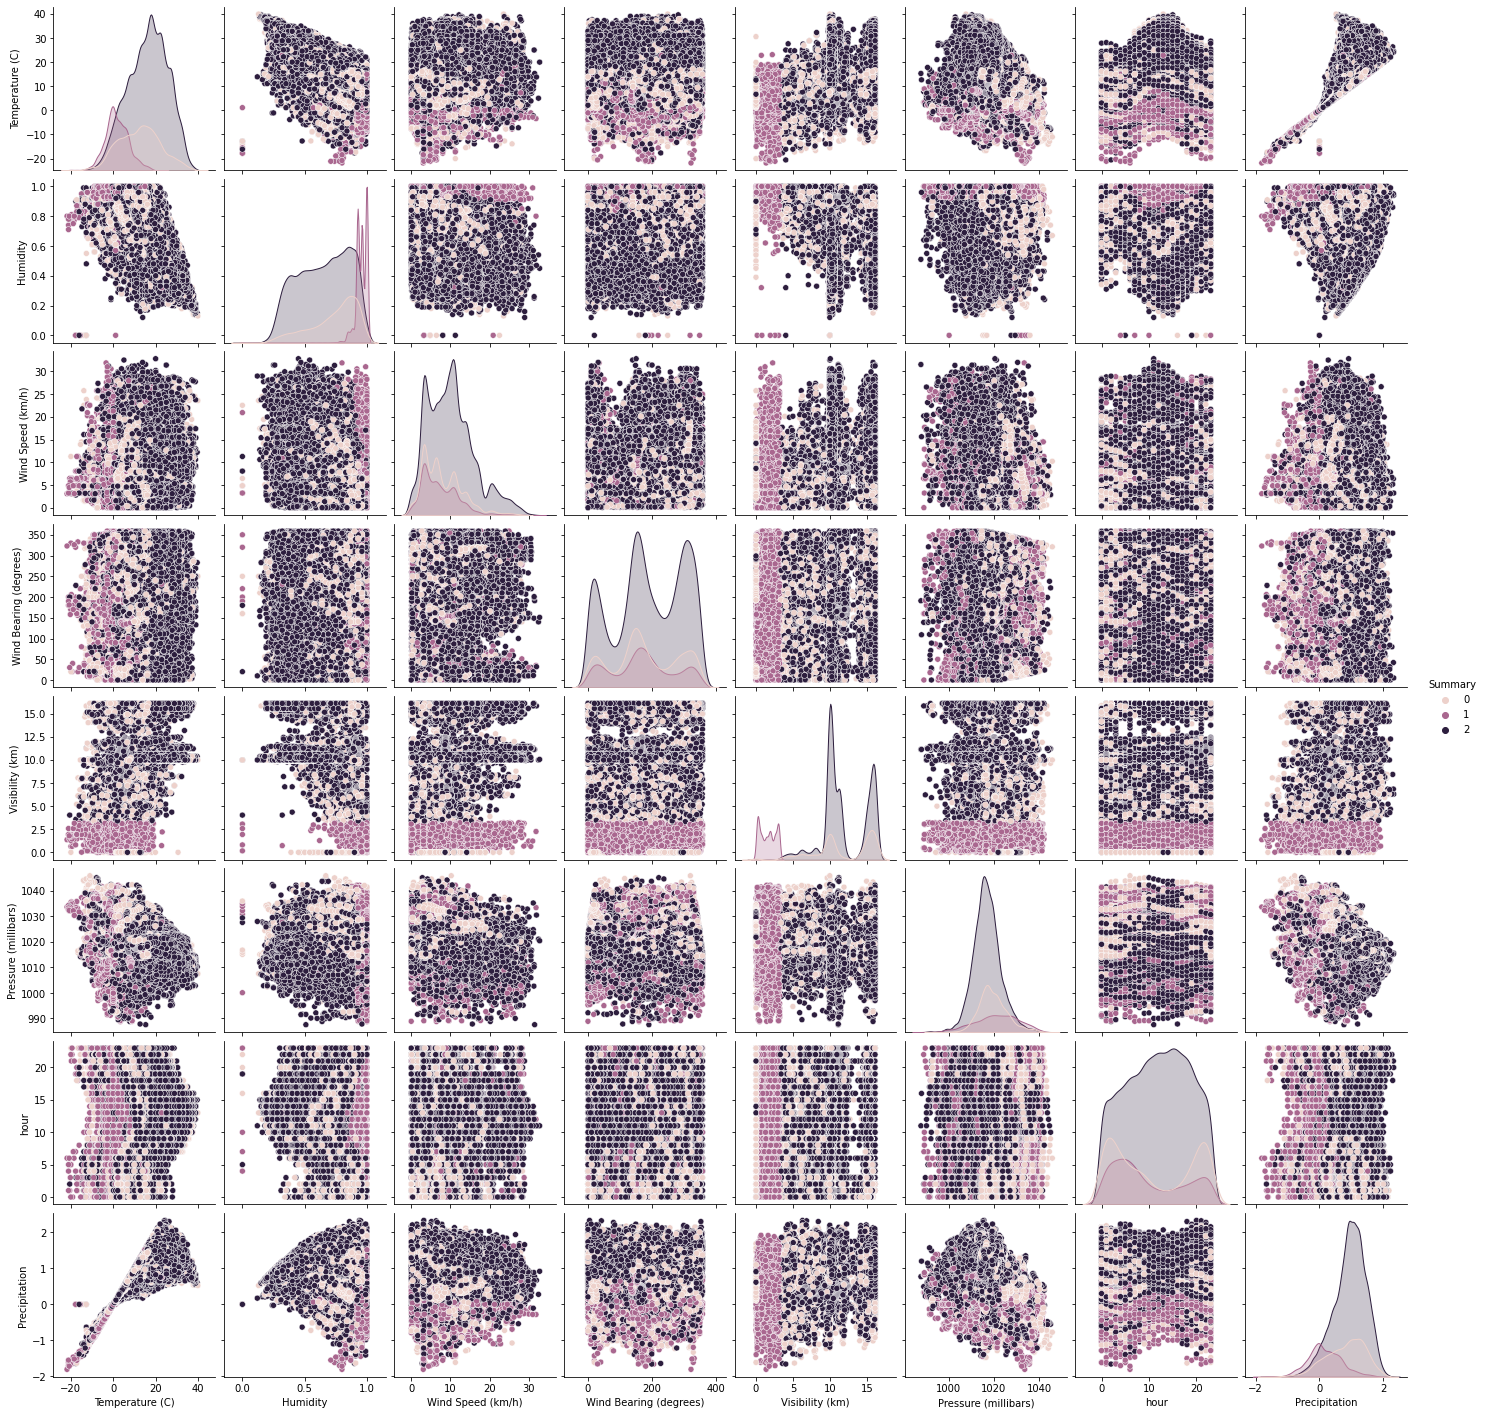

In [25]:
sns.pairplot(df1, hue="Summary")

# Shuffling Data Set For Reduce Bias Prediction

In [26]:

df1= df1.sample(frac=1, random_state=42)

df1.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
9670,2,22.177778,0.58,2.4633,142.0,15.8263,1012.80,15,08,20,1.302776
14629,2,17.416667,0.29,12.4292,7.0,10.3523,1012.80,01,05,12,0.511548
72907,0,-2.566667,0.91,1.0465,11.0,7.4865,1024.07,04,02,18,-0.239189
93761,2,11.111111,0.77,4.8300,150.0,16.1000,1014.28,18,05,19,0.867773
35863,2,18.622222,0.93,0.1449,350.0,9.9015,1017.29,11,08,5,1.761811


# Standardizing Data For Better Computation

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
col=df1.columns.tolist()
col.remove('Summary')


In [29]:
X=df1[col]
Y=df1['Summary']
col_names=X.columns
X

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
9670,22.177778,0.58,2.4633,142.0,15.8263,1012.80,15,08,20,1.302776
14629,17.416667,0.29,12.4292,7.0,10.3523,1012.80,01,05,12,0.511548
72907,-2.566667,0.91,1.0465,11.0,7.4865,1024.07,04,02,18,-0.239189
93761,11.111111,0.77,4.8300,150.0,16.1000,1014.28,18,05,19,0.867773
35863,18.622222,0.93,0.1449,350.0,9.9015,1017.29,11,08,5,1.761811
...,...,...,...,...,...,...,...,...,...,...
21275,30.855556,0.34,15.6975,160.0,10.3523,1013.42,12,07,9,1.063168
90936,-9.677778,0.93,3.0107,248.0,1.0787,1037.61,23,01,2,-0.933884
75673,0.472222,0.90,2.9302,338.0,13.9748,1011.91,26,03,3,0.043006
1671,0.022222,1.00,9.4990,329.0,1.4168,1027.24,17,12,14,0.002283


In [30]:
col_names

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'day', 'month', 'hour', 'Precipitation'],
      dtype='object')

In [31]:
ss=StandardScaler()
# ss=MinMaxScaler()
data=ss.fit_transform(X)

data

array([[ 0.85856521, -0.60170822, -1.18469172, ...,  0.42209953,
         1.21962031,  0.83425181],
       [ 0.39837855, -1.96002471,  0.54182742, ..., -0.51794746,
         0.09368866, -0.48312683],
       [-1.53311668,  0.94396227, -1.43014193, ..., -1.45799444,
         0.9381374 , -1.73308959],
       ...,
       [-1.23939194,  0.89712377, -1.10380471, ..., -1.14464545,
        -1.17298444, -1.26324067],
       [-1.28288683,  1.36550876,  0.03419175, ...,  1.67549551,
         0.37517157, -1.33104438],
       [ 0.97025579, -0.74222372,  0.34100452, ...,  0.10875053,
         1.21962031,  0.83435854]])

In [32]:
dff=pd.DataFrame(data,columns=col_names)
X=dff
X

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
0,0.858565,-0.601708,-1.184692,-0.408426,1.158665,-0.725241,-0.083562,0.422100,1.219620,0.834252
1,0.398379,-1.960025,0.541827,-1.694419,-0.001928,-0.725241,-1.683278,-0.517947,0.093689,-0.483127
2,-1.533117,0.943962,-1.430142,-1.656316,-0.609533,0.866197,-1.340481,-1.457994,0.938137,-1.733090
3,-0.211087,0.288223,-0.774678,-0.332219,1.216695,-0.516250,0.259235,-0.517947,1.078879,0.109980
4,0.514902,1.037639,-1.586338,1.572955,-0.097507,-0.091208,-0.540623,0.422100,-0.891502,1.598536
...,...,...,...,...,...,...,...,...,...,...
47255,1.697318,-1.725832,1.108036,-0.236961,-0.001928,-0.637691,-0.426358,0.108751,-0.328536,0.435309
47256,-2.220443,1.037639,-1.089859,0.601316,-1.968110,2.778183,0.830562,-1.771343,-1.313726,-2.889743
47257,-1.239392,0.897124,-1.103805,1.458645,0.766111,-0.850918,1.173358,-1.144645,-1.172984,-1.263241
47258,-1.282887,1.365509,0.034192,1.372912,-1.896427,1.313833,0.144969,1.675496,0.375172,-1.331044


# Balancing Data Set Over_Sampling

In [33]:
Y.value_counts()

2    30894
0     9699
1     6667
Name: Summary, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',k_neighbors=2)
X_resample,Y_resample=smote.fit_resample(X,Y)


In [36]:
Y_resample.value_counts()

2    30894
0    30894
1    30894
Name: Summary, dtype: int64

In [37]:
print(X_resample.shape)
X_resample = X_resample.drop_duplicates()
print(X_resample.shape)


(92682, 10)
(92682, 10)


In [38]:
X_resample

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day,month,hour,Precipitation
0,0.858565,-0.601708,-1.184692,-0.408426,1.158665,-0.725241,-0.083562,0.422100,1.219620,0.834252
1,0.398379,-1.960025,0.541827,-1.694419,-0.001928,-0.725241,-1.683278,-0.517947,0.093689,-0.483127
2,-1.533117,0.943962,-1.430142,-1.656316,-0.609533,0.866197,-1.340481,-1.457994,0.938137,-1.733090
3,-0.211087,0.288223,-0.774678,-0.332219,1.216695,-0.516250,0.259235,-0.517947,1.078879,0.109980
4,0.514902,1.037639,-1.586338,1.572955,-0.097507,-0.091208,-0.540623,0.422100,-0.891502,1.598536
...,...,...,...,...,...,...,...,...,...,...
92677,-1.453825,1.218459,-0.733415,-0.571981,-1.975618,2.098413,0.259235,1.675496,-0.406154,-1.628889
92678,-1.228261,1.137646,-0.934191,0.084345,-2.022265,3.289669,1.621155,1.184300,1.641845,-1.238020
92679,-1.699281,0.990801,-0.411945,-1.353674,-1.820682,2.775140,-0.083562,-1.771343,-0.988919,-2.016020
92680,-0.926109,1.365509,-0.530440,-0.007645,-2.118305,0.374518,0.030704,-1.457994,-1.397358,-0.703848


In [39]:
# X_resample.to_csv('weather_clean.csv')

# MODEL TRAINING

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, Y_resample, test_size=0.2, random_state=40,stratify=Y_resample)

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
# # names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
# #          "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
# #          "Naive_Bayes", "QDA", "SGD"]

# names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", 
#          "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
#          "Naive_Bayes", "QDA", "SGD"]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(kernel="poly", degree=3, C=0.025),
#     SVC(kernel="rbf", C=1, gamma=2),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
#     DecisionTreeClassifier(max_depth=5),
#     ExtraTreesClassifier(n_estimators=10, min_samples_split=12),
#     RandomForestClassifier(max_depth=5, n_estimators=100),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(n_estimators=100),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     SGDClassifier(loss="hinge", penalty="l2")]

In [41]:
names=[]
train_scores=[]
test_scores=[]

In [44]:
# print(names)
# print(len(names))

# Parametric Algorithm

# First

In [42]:
name='RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)'

rbc = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
rbc.fit(X_train,y_train)
y_pred = rbc.predict(X_test)
train_score=rbc.score(X_train, y_train)
test_score=rbc.score(X_test, y_test)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9328909748071424


In [43]:
name='RandomForestClassifier(max_depth=30,n_estimators=90,random_state=10)'

rbc = RandomForestClassifier(max_depth=30,n_estimators=90,random_state=10)
rbc.fit(X_train,y_train)
y_pred = rbc.predict(X_test)
train_score=rbc.score(X_train, y_train)
test_score=rbc.score(X_test, y_test)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9333764902627179


In [44]:
name='RandomForestClassifier(max_depth=22,n_estimators=110,random_state=12)'

rbc = RandomForestClassifier(max_depth=22,n_estimators=110,random_state=12)
rbc.fit(X_train,y_train)
y_pred = rbc.predict(X_test)
train_score=rbc.score(X_train, y_train)
test_score=rbc.score(X_test, y_test)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

0.9998921033110797
0.9319199438959918


# Second

In [45]:
name='ExtraTreesClassifier(n_estimators=500,random_state=42)'

etc1=ExtraTreesClassifier(n_estimators=500,random_state=42)
etc1.fit(X_train, y_train)
test_score = etc1.score(X_test, y_test)
train_score = etc1.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.953228677779576


Cross Validation

In [49]:
# from sklearn.model_selection import cross_val_score

# # Define the model
# model = ExtraTreesClassifier(n_estimators=500,random_state=42)

# # Perform 5-fold cross-validation on the training data
# scores = cross_val_score(model, X_train, y_train, cv=5)

# # Print the accuracy scores for each fold and the mean score
# print('Accuracy Scores:', scores)
# print('Mean Accuracy:', scores.mean())


In [46]:
name='ExtraTreesClassifier(n_estimators=400,random_state=42)'

etc2=ExtraTreesClassifier(n_estimators=400,random_state=42)
etc2.fit(X_train, y_train)
test_score = etc2.score(X_test, y_test)
train_score = etc2.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9526352700005395


In [47]:
name='ExtraTreesClassifier(n_estimators=450,random_state=42)'

etc3=ExtraTreesClassifier(n_estimators=450,random_state=42)
etc3.fit(X_train, y_train)
test_score = etc3.score(X_test, y_test)
train_score = etc3.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9530668392943842


In [48]:
name='ExtraTreesClassifier(n_estimators=600,random_state=40)'

etc4=ExtraTreesClassifier(n_estimators=600,random_state=40)
etc4.fit(X_train, y_train)
test_score = etc4.score(X_test, y_test)
train_score = etc4.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)
y_pred_etc4=etc4.predict(X_test)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9521497545449641


In [49]:
name="ExtraTreesClassifier(max_depth=45, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)"

etc5=ExtraTreesClassifier(max_depth=45, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
etc5.fit(X_train, y_train)

test_score = etc5.score(X_test, y_test)
train_score = etc5.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)
y_pred=etc5.predict(X_test)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9493985002967039


# Third

In [50]:
name='DecisionTreeClassifier()'

dtc1=DecisionTreeClassifier()
dtc1.fit(X_train,y_train)
y_pred = dtc1.predict(X_test)


test_score = dtc1.score(X_test, y_test)
train_score = dtc1.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.8728488968009926


In [51]:
name="DecisionTreeClassifier(criterion='gini')"

dtc2=DecisionTreeClassifier(criterion='gini')
dtc2.fit(X_train,y_train)
y_pred = dtc2.predict(X_test)

test_score = dtc2.score(X_test, y_test)
train_score = dtc2.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.872255489021956


In [52]:
name="DecisionTreeClassifier(criterion='entropy')"

dtc3=DecisionTreeClassifier(criterion='entropy')
dtc3.fit(X_train,y_train)
y_pred = dtc3.predict(X_test)


test_score = dtc3.score(X_test, y_test)
train_score = dtc3.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.8744672816529104


# Non Parametric Algorithm

# First

In [53]:
name="BaggingClassifier(n_estimators=50, random_state=2)"

bc = BaggingClassifier(n_estimators=50, random_state=2)
bc.fit(X_train,y_train)
y_pred2 = bc.predict(X_test)

test_score = bc.score(X_test, y_test)
train_score = bc.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)



0.9999460516555398
0.9129848411285537


In [54]:
name="BaggingClassifier(n_estimators=500, random_state=2)"

bc1 = BaggingClassifier(n_estimators=500, random_state=2)
bc1.fit(X_train,y_train)
y_pred2 = bc1.predict(X_test)


test_score = bc1.score(X_test, y_test)
train_score = bc1.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)


1.0
0.9156821492150834


In [55]:
name="BaggingClassifier(n_estimators=300, random_state=42)"
bc2 = BaggingClassifier(n_estimators=300, random_state=42)
bc2.fit(X_train,y_train)
y_pred2 = bc2.predict(X_test)

test_score = bc2.score(X_test, y_test)
train_score = bc2.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9156282030533528


# Second

In [56]:
name="KNeighborsClassifier(n_neighbors=3, weights='distance', p=2, algorithm='kd_tree')"

knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2, algorithm='kd_tree')
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train) 
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.915196633759508


In [57]:
name="KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, algorithm='kd_tree')"

knn1 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, algorithm='kd_tree')
knn1.fit(X_train, y_train)
test_score = knn1.score(X_test, y_test)
train_score = knn1.score(X_train, y_train) 
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9051087015158872


In [58]:
name="KNeighborsClassifier(n_neighbors=4, weights='distance', p=2, algorithm='kd_tree')"

knn2 = KNeighborsClassifier(n_neighbors=4, weights='distance', p=2, algorithm='kd_tree')
knn2.fit(X_train, y_train)
test_score = knn2.score(X_test, y_test)
train_score = knn2.score(X_train, y_train) 
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

1.0
0.9176242110373847


# Third

In [59]:
name="SVC(kernel='linear', C=0.025)"


svc1=SVC(kernel="linear", C=0.025)
svc1.fit(X_train, y_train)
test_score = svc1.score(X_test, y_test)
train_score = svc1.score(X_train, y_train) 
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

0.749450401240812
0.751038463613314


In [60]:
name="SVC(kernel='poly', degree=3, C=0.025)"

svc2=SVC(kernel="poly", degree=3, C=0.025)
svc2.fit(X_train, y_train)
test_score = svc2.score(X_test, y_test)
train_score = svc2.score(X_train, y_train) 
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)

0.7633286128531931
0.761234288180396


In [ ]:
# svc3=SVC(kernel="rbf", C=1, gamma=2)
# svc3.fit(X_train, y_train)
# test_score = svc3.score(X_test, y_test)
# train_score = svc3.score(X_train, y_train) 
# print(train_score)
# print(test_score)



# Neural Network Architecture.

# First

In [61]:
import tensorflow as tf
from tensorflow import keras

name='neural network 1'
input_dim = X_train.shape[1]
num_classes=3
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
train=model.evaluate(X_train, y_train)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

names.append(name)
train_scores.append(train)
test_scores.append(accuracy)

Epoch 1/10
2318/2318 [==============================] - 11s 4ms/step - loss: 0.5018 - accuracy: 0.7421 - val_loss: 0.4417 - val_accuracy: 0.7643
Epoch 2/10
2318/2318 [==============================] - 9s 4ms/step - loss: 0.4410 - accuracy: 0.7711 - val_loss: 0.4128 - val_accuracy: 0.7885
Epoch 3/10
2318/2318 [==============================] - 8s 4ms/step - loss: 0.4242 - accuracy: 0.7800 - val_loss: 0.3994 - val_accuracy: 0.7959
Epoch 4/10
2318/2318 [==============================] - 9s 4ms/step - loss: 0.4117 - accuracy: 0.7871 - val_loss: 0.3898 - val_accuracy: 0.8040
Epoch 5/10
2318/2318 [==============================] - 9s 4ms/step - loss: 0.4061 - accuracy: 0.7932 - val_loss: 0.3852 - val_accuracy: 0.8005
Epoch 6/10
2318/2318 [==============================] - 8s 4ms/step - loss: 0.3984 - accuracy: 0.7968 - val_loss: 0.3848 - val_accuracy: 0.8039
Epoch 7/10
2318/2318 [==============================] - 8s 4ms/step - loss: 0.3939 - accuracy: 0.7999 - val_loss: 0.3748 - val_accuracy

# Second

In [62]:
import tensorflow as tf
from tensorflow import keras

name='neural network 2'
input_dim = X_train.shape[1]
num_classes=3
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.5),  # Dropout layer with a rate of 0.5
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer with a rate of 0.5
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
names.append(name)
train_scores.append(train)
test_scores.append(accuracy)

Epoch 1/10
2318/2318 [==============================] - 11s 4ms/step - loss: 0.5593 - accuracy: 0.7066 - val_loss: 0.4620 - val_accuracy: 0.7499
Epoch 2/10
2318/2318 [==============================] - 9s 4ms/step - loss: 0.4797 - accuracy: 0.7440 - val_loss: 0.4425 - val_accuracy: 0.7692
Epoch 3/10
2318/2318 [==============================] - 16s 7ms/step - loss: 0.4600 - accuracy: 0.7548 - val_loss: 0.4315 - val_accuracy: 0.7753
Epoch 4/10
2318/2318 [==============================] - 12s 5ms/step - loss: 0.4496 - accuracy: 0.7615 - val_loss: 0.4249 - val_accuracy: 0.7829
Epoch 5/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4432 - accuracy: 0.7669 - val_loss: 0.4148 - val_accuracy: 0.7863
Epoch 6/10
2318/2318 [==============================] - 11s 5ms/step - loss: 0.4395 - accuracy: 0.7701 - val_loss: 0.4129 - val_accuracy: 0.7870
Epoch 7/10
2318/2318 [==============================] - 11s 5ms/step - loss: 0.4348 - accuracy: 0.7728 - val_loss: 0.4103 - val_acc

# Third

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop
from keras.regularizers import l2

name='neural network 3'
input_dim = X_train.shape[1]
num_classes=3
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
    keras.layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
names.append(name)
train_scores.append(train)
test_scores.append(accuracy)

Epoch 1/10
2318/2318 [==============================] - 14s 5ms/step - loss: 0.5570 - accuracy: 0.7403 - val_loss: 0.4759 - val_accuracy: 0.7725
Epoch 2/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4752 - accuracy: 0.7707 - val_loss: 0.4415 - val_accuracy: 0.7868
Epoch 3/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4532 - accuracy: 0.7817 - val_loss: 0.4376 - val_accuracy: 0.7860
Epoch 4/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4419 - accuracy: 0.7848 - val_loss: 0.4219 - val_accuracy: 0.7973
Epoch 5/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4342 - accuracy: 0.7886 - val_loss: 0.4163 - val_accuracy: 0.8017
Epoch 6/10
2318/2318 [==============================] - 10s 4ms/step - loss: 0.4302 - accuracy: 0.7901 - val_loss: 0.4188 - val_accuracy: 0.7962
Epoch 7/10
2318/2318 [==============================] - 9s 4ms/step - loss: 0.4259 - accuracy: 0.7939 - val_loss: 0.4106 - val_acc

# Training Classifer Without Library

In [72]:
from Decision import *

name="Decision Tree Without Library"

dt_code = DecisionTreeClassifier(max_depth=3)

dt_code.fit(X_train,y_train)
y_pred2 = dt_code.predict(X_test)


test_score = dt_code.score(X_test, y_test)
train_score = dt_code.score(X_train, y_train) 
# print(score)
print(train_score)
print(test_score)

names.append(name)
train_scores.append(train_score)
test_scores.append(test_score)


0.7761008834041405
0.7723471974968981


# Tabular And Graphical Representation Of Model Accuracy

In [73]:
data=pd.DataFrame({"Model Names":names,'Training Accuracy' : train_scores,'Testing Accuracy' : test_scores})
data

,Model Names,Training Accuracy,Testing Accuracy
0,"RandomForestClassifier(max_depth=32,n_estimato...",1.0,0.932891
1,"RandomForestClassifier(max_depth=30,n_estimato...",1.0,0.933376
2,"RandomForestClassifier(max_depth=22,n_estimato...",0.999892,0.931920
3,"ExtraTreesClassifier(n_estimators=500,random_s...",1.0,0.953229
4,"ExtraTreesClassifier(n_estimators=400,random_s...",1.0,0.952635
5,"ExtraTreesClassifier(n_estimators=450,random_s...",1.0,0.953067
6,"ExtraTreesClassifier(n_estimators=600,random_s...",1.0,0.952150
7,"ExtraTreesClassifier(max_depth=45, min_samples...",1.0,0.949399
8,DecisionTreeClassifier(),1.0,0.872849
9,DecisionTreeClassifier(criterion='gini'),1.0,0.872255


# Best Performed Model

In [74]:
data.iloc[np.argmax(data['Testing Accuracy'])].to_frame().reset_index()

,index,3
0,Model Names,"ExtraTreesClassifier(n_estimators=500,random_s..."
1,Training Accuracy,1.0
2,Testing Accuracy,0.953229


In [77]:
accuracy_df=data

In [78]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a DataFrame named "accuracy_df" with two columns: "Model" and "Testing Accuracy"

# Sort the DataFrame by testing accuracy in descending order
accuracy_df = accuracy_df.sort_values(by="Testing Accuracy", ascending=False)

# Truncate the model names to a specified number of characters
max_chars = 10
accuracy_df['Shortened Model'] = data['Model Names'].str[:max_chars]

# Creating the horizontal bar chart using Plotly with truncated model names
fig = go.Figure()

fig.add_trace(go.Bar(
    y=accuracy_df["Shortened Model"],
    x=accuracy_df["Testing Accuracy"],
    orientation="h",
    marker=dict(
        color=accuracy_df["Testing Accuracy"],
        coloraxis="coloraxis"
    )
))

fig.update_layout(
    title="Testing Accuracy of Models",
    xaxis_title="Testing Accuracy",
    yaxis_title="Model",
    coloraxis=dict(colorscale="Viridis"),
    autosize=False,
    width=800,
    height=600
)

fig.update_xaxes(tickangle=-45)

fig.show()


<Axes: xlabel='Testing Accuracy', ylabel='Shortened Model'>

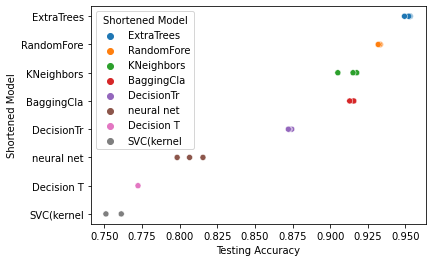

In [79]:
sns.scatterplot(x=accuracy_df["Testing Accuracy"],y=accuracy_df["Shortened Model"],hue=accuracy_df["Shortened Model"])

# Feature Importance Of Extra Tree Classifier

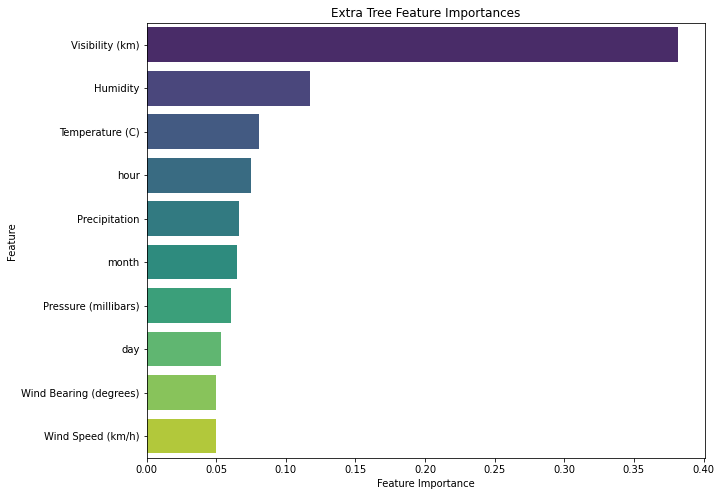

In [80]:
importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': etc4.feature_importances_
})
importances_df = importances_df.sort_values('importance', ascending=False)

# create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Extra Tree Feature Importances')
plt.show()

# Stacking Classifier

In [81]:
# Define estimators
from sklearn.ensemble import StackingClassifier


estimator_list = [
    ('knn',knn),
    ('rfc',rbc),
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=ExtraTreesClassifier(n_estimators=600,random_state=40)
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
# stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
# stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
# print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
# print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.9953469552903095
- F1 score: 0.9953469855758876
----------------------------------
Model performance for Test set
- Accuracy: 0.937584290877704
- F1 score: 0.9375729917368726


# Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


clf = ExtraTreesClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [200,500,600],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Maximum number of features considered for splitting
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the classifier with the best parameters
best_clf = ExtraTreesClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


# Confusion Matrix

[[5831   15  333]
 [   0 6179    0]
 [ 528   11 5640]]


Text(33.0, 0.5, 'True Labels')

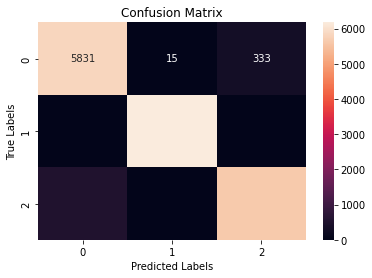

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf = confusion_matrix(y_test, y_pred_etc4)
print(conf)
sns.heatmap(conf, annot=True,fmt='g')
# set plot properties
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


# Saving Accuracies Of Model In Csv Format

In [94]:
data.to_csv('Model_performance.csv')

# Model and Standaradization Saving For Prediction

In [96]:

pickle.dump(etc4,open('model.pkl','wb'))


In [98]:
pickle.dump(ss,open('scaler.pkl','wb'))